In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## How Large is "Large"? ##

Let $X_1, X_2, \ldots, X_n$ be i.i.d. with mean $\mu$ and SD $\sigma$, and let $S_n = X_1 + X_2 + \cdots + X_n$. The Central Limit Theorem says that no matter what the distribution of $X_1$, after some large enough $n$ the distribution of $S_n$ looks roughly normal.

This raises the question of how large is "large enough". We have seen in examples that the answer depends on the distribution of $X_1$. If the distribution of $X_1$ is smooth and symmetric, the distribution of the sample sum can start looking normal even when the sample size $n$ is moderate. If the distribution of $X_1$ is skewed or has gaps, then the sample size might have to get larger before the normal approximation is good.

### Approximations to the Binomial ###

A binomial $(n, p)$ random variable is the sum of $n$ i.i.d. Bernoulli $(p)$ random variables. By the Central Limit Theorem, the binomial $(n, p)$ distribution should look roughly normal for large enough $n$.

And indeed for $n = 100$ and $p = 0.5$, the binomial $(n, p)$ distribution looks beautifully normal.

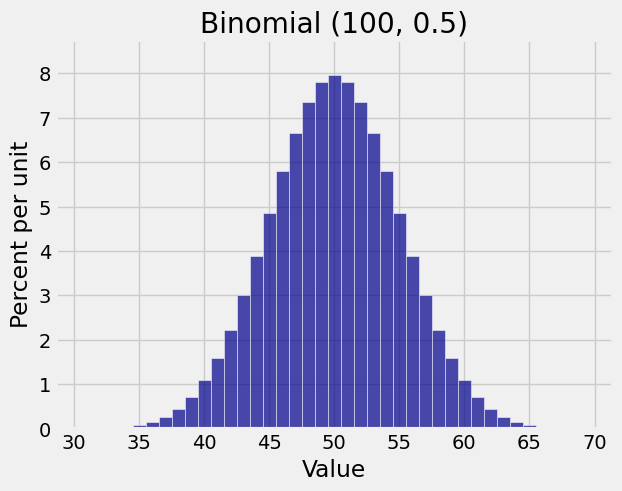

In [2]:
# NO CODE

k = np.arange(30, 71)
probs = stats.binom.pmf(k, 100, 0.5)
dist = Table().values(k).probabilities(probs)
Plot(dist)
plt.title('Binomial (100, 0.5)');

A sample size of 100 seems pretty large. Let's take a look at the binomial $(100, 0.01)$ distribution.

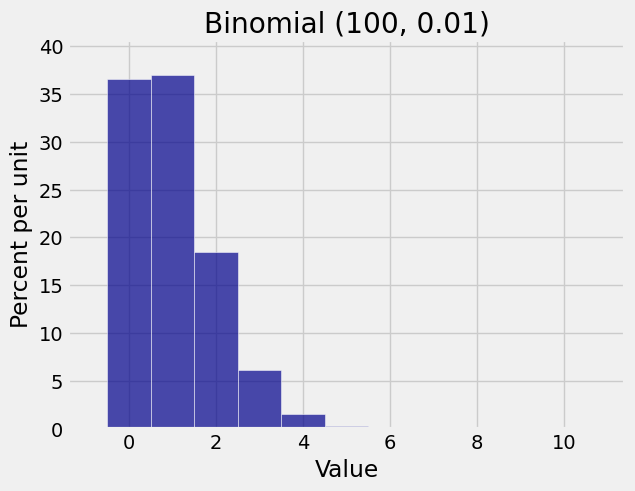

In [3]:
# NO CODE

k = np.arange(11)
probs = stats.binom.pmf(k, 100, 0.01)
dist = Table().values(k).probabilities(probs)
Plot(dist)
plt.title('Binomial (100, 0.01)');

That's definitely not normal. It's close to Poisson with parameter $\mu = 100 \times 0.01 = 1$, as you have seen earlier. 

Does this contradict the Central Limit Theorem? 

No – it just demonstrates that the sample size needed for the normal approximation to start working depends on the distribution you start with.

A binomial $(100, 0.5)$ random variable is the sum of 100 i.i.d. Bernoulli $(0.5)$ random variables. Each indicator has the uniform distribution on the two values $0$ and $1$. There's no skewness or lack of smoothness in that distribution, and $n = 100$ is enough for the normal approximation to work.

But a binomial $(100, 0.01)$ random variable is the sum of 100 i.i.d. Bernoulli $(0.01)$ random variables. Each indicator has chance $99/100$ of being $0$ and chance only $1/100$ of being $1$. That's pretty skewed, and the sample size of $n = 100$ isn't large enough for the normal approximation to work.

When $n = 1000$, you see the normal curve start to appear.

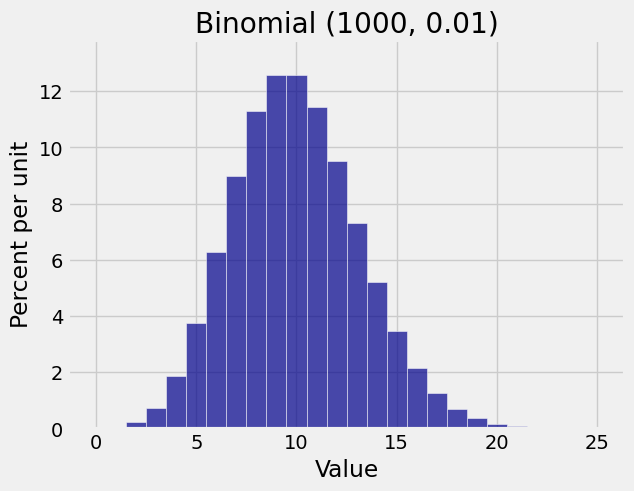

In [4]:
# NO CODE

k = np.arange(26)
probs = stats.binom.pmf(k, 1000, 0.01)
dist = Table().values(k).probabilities(probs)
Plot(dist)
plt.title('Binomial (1000, 0.01)');

When $n = 5000$ the normal approximation is excellent.

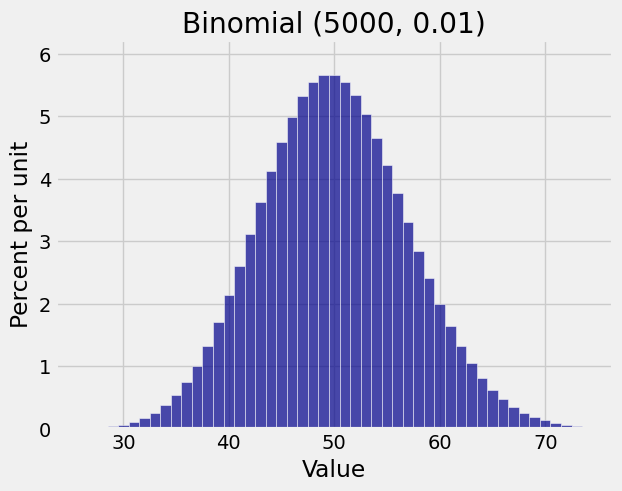

In [5]:
# NO CODE

k = np.arange(25, 76)
probs = stats.binom.pmf(k, 5000, 0.01)
dist = Table().values(k).probabilities(probs)
Plot(dist)
plt.title('Binomial (5000, 0.01)');

The interplay between the expectation and the SD affects the shape. For a distribution to look normal, the possible values have to stretch for three or fours SDs on both sides of the mean.

When $n$ is large but $p$ is so small that $np$ is near the minimum possible value $0$, the distribution is squeezed up against a barrier and has little room to spread out below the mean. This leads to the typical Poisson "count of rare events" shape.

For the same small $p$, you can keep increasing $n$ till the mean $np$ is much bigger than the SD $\sqrt{npq}$. That's when the normal curve starts appearing.

### Ways to Decide If $n$ is Large Enough ###

In the general case when the random variables being added are not indicators, there are no universal rules about how large the sample size has to be for the normal approximation to work. You can consider two ways of making the decision.

- If you have the entire sample, as you did in Data 8, you can bootstrap the sample sum. Just create numerous bootstrap samples and compute the sum each time. If the distribution of all your bootstrapped sums looks roughly normal, go ahead and use the normal approximation.

- If you just have the population mean $\mu$ and SD $\sigma$, and a sample size $n$ that seems large, then draw a normal curve with center $n\mu$ and points of inflection at a distance $\sqrt{n}\sigma$ on either side of the mean. Make sure you draw the normal curve all the way out to three or four SDs on either side. If you don't start hitting impossible values (such as negative numbers for a variable that's non-negative, or values bigger than 100 for a variable that's a percent), then as far as this course is concerned you can assume the Central Limit Theorem has kicked in for the distribution of the sample sum. 